In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from operator import itemgetter
from sklearn.cluster import KMeans as KMeans_sklearn
from sklearn.metrics import silhouette_score

In [2]:
def Distance(point, centroid):
    return np.linalg.norm(point-centroid)

In [3]:
def ShortestDist(point, centroids):
    dist = np.zeros(len(centroids))

    for i in range(len(centroids)):
        dist[i] = Distance(point, centroids[i])
        
    return np.argmin(dist)

In [4]:
def SumVariance(data, clusters, centroids):
    s = 0  # sum of the variances 
    variance = 0    # list of variances for each dimention

    
    for i in range(len(centroids)):    # Goes k times
        coords =[]
        index = np.where(clusters == i)[0]
        
        for d in range(len(data)):  # All point in a cluster
            coords.append(data[d][index])
        
        for l in range(len(index)):  # Goes through each point in cluster
            point = [row[l] for row in coords]
            variance += Distance(point, centroids[i])**2
                

        
    return variance

In [5]:
def Update(data, clusters, centroid):
    n = len(data)
    mean = np.zeros(n)
    
    for i in range(n):
        index = np.where(clusters == clusters[-1])[0] # Uses latest assigned cluster-id 
        temp = np.append(data[i][index], centroid[i]) #    to find all point assigned to it
        mean[i] = np.mean(temp)
        
    return mean

In [6]:
def KMeans(data, k=3, iterations=1):
    data = np.array(data)
    dim = len(data)
    
    totalVariance = []
    
    for p in range(iterations):

        clusters = np.array([-1 for _ in range(len(data[0]))]) # assigns a value (0-k) corrosponding to a cluster id
        
        # Creates and assigns a random position for each centroid
        centroids = []
        for _ in range(k):             # Generates random coordinates for each centroid
            values = np.zeros(dim)     # Coords for centroid
            for m in range(dim):   
                values[m] = np.random.random_sample()
            centroids.append(values)   # Addigns the random value to centroid

        # Assigns a point to one of the clusters and then moves the corrosponding centroid
        #     closer to it by calculating the mean
        
        for i in range(len(data[0])):
            point = np.zeros(dim)
            
            for n in range(dim):       # One row of each sample corrosponding to one point on the plot
                point[n] = data[n][i]    

            cid = ShortestDist( (point), centroids )  # Returns the cluster-id for the nearest centroid
            clusters[i] = cid                         # Stores cluster-id for the corresponding point
            centroids[cid] = Update(data, clusters[:i+1], centroids[cid]) # Moves centroid 
            
            # Stores all information about one clustering solution
        totalVariance.append([SumVariance(data, clusters, centroids), clusters, centroids])

     
    if iterations > 1: 
        totalVariance.sort(key=itemgetter(0)) # Sorts on variance
        
    return totalVariance[0]
    

In [7]:
def Reshape(data):  # Reshapes data to have shape (dim, samples)
    d = np.array(data)
    n,m = data.shape
    arr = []
    for i in range(m):
        row = np.zeros(n)
        for j in range(n):
            row[j] = d[j][i]
        arr.append(row)
            
    return arr

In [8]:
def Scatterplot(data, result, centroids, labels):
    colors = { 0: "r", 1: "g", 2: "b", 3: "y", 4: "gray"}    
    
    d = np.array(data)
    for k in range(len(result)):
        plt.scatter(*d[k], c=colors[result[k]])

    for centroid in centroids:
        plt.scatter(*centroid, c="black")
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.figure()

In [9]:
def Kplot(data, itr=100):
    N = 10
    x = np.linspace(1,N,N)
    var = np.zeros(N)
    for w in range(N):
        variance, result, centroids = KMeans(data, k=w+1, iterations=itr)
        var[w] = variance

    plt.plot(x,var)
    plt.ylabel("Variance")
    plt.xlabel("K value")
    plt.figure()

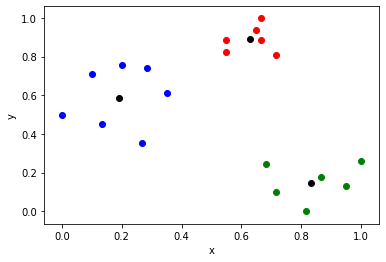

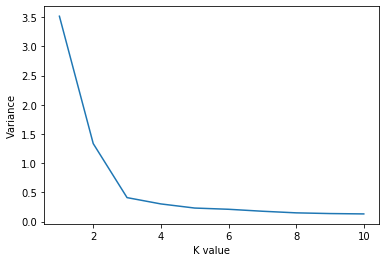

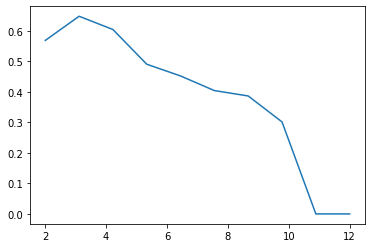

In [30]:
df = pd.DataFrame({
        "x": [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
        "y": [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 16, 24]  })



d = df.iloc[:,0:2]
scaler = MinMaxScaler()
data_standardized = scaler.fit_transform(d)
data = Reshape(data_standardized)


variance, result, centroids = KMeans(data, k=3, iterations=1000)

Scatterplot(data_standardized, result, centroids, ["x","y"])
Kplot(data,itr=100)

score = np.zeros(10)
for i in range(2,10,1):
    kmeans = KMeans_sklearn(n_clusters=i, random_state=0).fit(data_standardized)
    score[i-2] = silhouette_score(data_standardized, kmeans.labels_)
plt.plot(np.linspace(2,12,10), score)


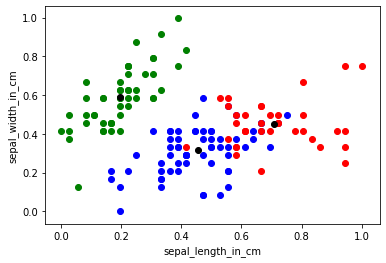

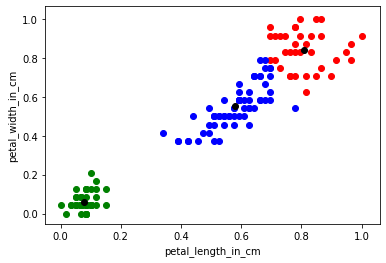

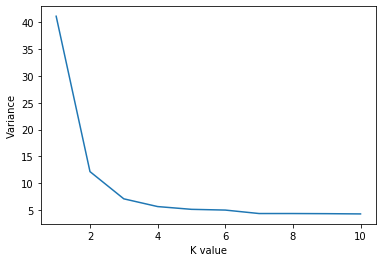

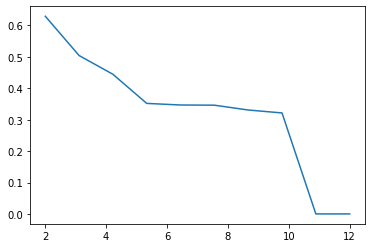

In [34]:
dataset = pd.read_csv("iris/iris.data", usecols=[0,1,2,3,4], 
                      names=['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'flower_name'])

d = dataset.iloc[:,0:4]

scaler = MinMaxScaler()

data_standardized = scaler.fit_transform(d)
data = Reshape(data_standardized)
variance, result, centroids = KMeans(data, k=3, iterations=100)

Scatterplot(data_standardized[:,:2], result, np.array(centroids)[:,:2], ['sepal_length_in_cm', 'sepal_width_in_cm'])
Scatterplot(data_standardized[:,2:], result, np.array(centroids)[:,2:], ['petal_length_in_cm', 'petal_width_in_cm'])

Kplot(data, itr=100)
for i in range(2,10,1):
    kmeans = KMeans_sklearn(n_clusters=i, random_state=0).fit(data_standardized)
    score[i-2] = silhouette_score(data_standardized, kmeans.labels_)
plt.plot(np.linspace(2,12,10), score)